# pulling text from internet or scraping the data from internet

In [1]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="BB3Y91DIn_izYlWCqIM2xw",
    client_secret="p-GNweZQhLOKHVq1Zf4XhbrlZ2vC0Q",
    user_agent=user_agent
)

In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [6]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("tesla").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

r/TeslaMotors is the subreddit you're looking for
15qiyhk
dalkon
1691983573.0
19
0.84
https://www.reddit.com/r/teslamotors
0


In [7]:
headlines = set()
for submission in reddit.subreddit("tesla").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

28


In [54]:
df = pd.DataFrame(headlines)
df.columns = ['Titles']
df.head()

,Titles
0,Waterfall fountain 1913 Nikola Tesla US1113716...
1,John T Williams electro-port: linear motor mai...
2,"I’m Marc J. Seifer, noted biographer of Tesla ..."
3,The US Military’s Naval Research Laboratory Tr...
4,Inductive nuclear reactor for direct conversio...


In [55]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles
0,Waterfall fountain 1913 Nikola Tesla US1113716...
1,John T Williams electro-port linear motor mail...
2,"I’m Marc J. Seifer, noted biographer of Tesla ..."
3,The US Military’s Naval Research Laboratory Tr...
4,Inductive nuclear reactor for direct conversio...


In [9]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [11]:
df.head()

,Titles
0,Waterfall fountain 1913 Nikola Tesla US1113716...
1,John T Williams electro-port: linear motor mai...
2,"I’m Marc J. Seifer, noted biographer of Tesla ..."
3,The US Military’s Naval Research Laboratory Tr...
4,Inductive nuclear reactor for direct conversio...


In [13]:
df.Titles.duplicated().sum() 

0

# regex to remove stop words

In [33]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [34]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


In [35]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'this', 'when', 'will', 'had', 'you', 'each', 'shan', 'out', 'under', 'above', 'having', 'couldn', 'ours', 'between', 'am', 'very', 'again', 'yours', 'once', 'should', 'whom', 'and', 'they', 'own', 'herself', "she's", 'its', 's', 'don', 've', 'on', 'my', "it's", 'or', 'but', 'why', 'haven', "don't", 'shouldn', 'doing', "you'll", "mustn't", 'after', "you're", 'isn', 'didn', 'them', 'aren', 'her', 'then', "mightn't", 'he', 'who', 'did', 'were', 'him', 'she', 'be', "shan't", 'our', 'for', 'doesn', 'me', 'what', 'have', 'at', 'if', 'of', 'was', 'through', 'yourself', 'against', 'hers', 'needn', 'wasn', 'all', 'other', 'than', 'it', 'during', 'from', 'about', 'in', 'over', 'which', 'those', 'ourselves', 'where', 'hadn', 'below', 'weren', 'ma', 'can', 'myself', 'has', 'that', 'the', 'll', 'being', 'an', 'into', 'd', "you'd", 'not', 'himself', "wasn't", 'we', "that'll", 'nor', 're', 'hasn', 'so', 'theirs', 'as', "hadn't", 'just', 'wouldn', 'themselves', "aren't", 'with', "couldn't", 'too', '

[nltk_data] Downloading package stopwords to C:\Users\Venkat
[nltk_data]     Dyagala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
!pip install textblob

# word frequency analysis , word clouds and sentiment Analysis

In [25]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [26]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)

#Now display data
df.head()

,Titles,Subjectivity,Polarity
0,Waterfall fountain 1913 Nikola Tesla US1113716...,0.433333,-0.050000
1,John T Williams electro-port: linear motor mai...,0.000000,0.000000
2,"I’m Marc J. Seifer, noted biographer of Tesla ...",0.277273,0.018182
3,The US Military’s Naval Research Laboratory Tr...,0.250000,-0.075000
4,Inductive nuclear reactor for direct conversio...,0.500000,0.083333


In [27]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Waterfall fountain 1913 Nikola Tesla US1113716...,0.433333,-0.050000,Negative
1,John T Williams electro-port: linear motor mai...,0.000000,0.000000,Neutral
2,"I’m Marc J. Seifer, noted biographer of Tesla ...",0.277273,0.018182,Positive
3,The US Military’s Naval Research Laboratory Tr...,0.250000,-0.075000,Negative
4,Inductive nuclear reactor for direct conversio...,0.500000,0.083333,Positive
5,Bruce Perreault - Converting Cosmic Rays to El...,0.000000,0.000000,Neutral
6,Tesla Statue on Cdn side of Niagara Falls 11/2...,0.000000,0.000000,Neutral
7,Books Tesla Read? Educated?,0.000000,0.000000,Neutral
8,Bruce Perreault alpha fusion valve 2007 ⚛ US78...,0.000000,0.000000,Neutral
9,Tesla's FBI File and US Patents,0.000000,0.000000,Neutral


In [29]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

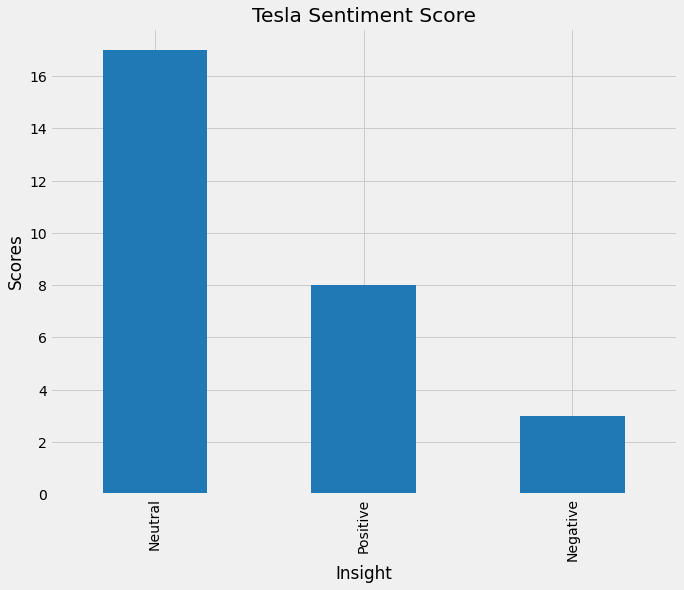

In [30]:
#Plot the values count of sentiment
plt.title("Tesla Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

In [21]:
df.head()

,Titles
0,Waterfall fountain 1913 Nikola Tesla US1113716...
1,John T Williams electro-port: linear motor mai...
2,"I’m Marc J. Seifer, noted biographer of Tesla ..."
3,The US Military’s Naval Research Laboratory Tr...
4,Inductive nuclear reactor for direct conversio...


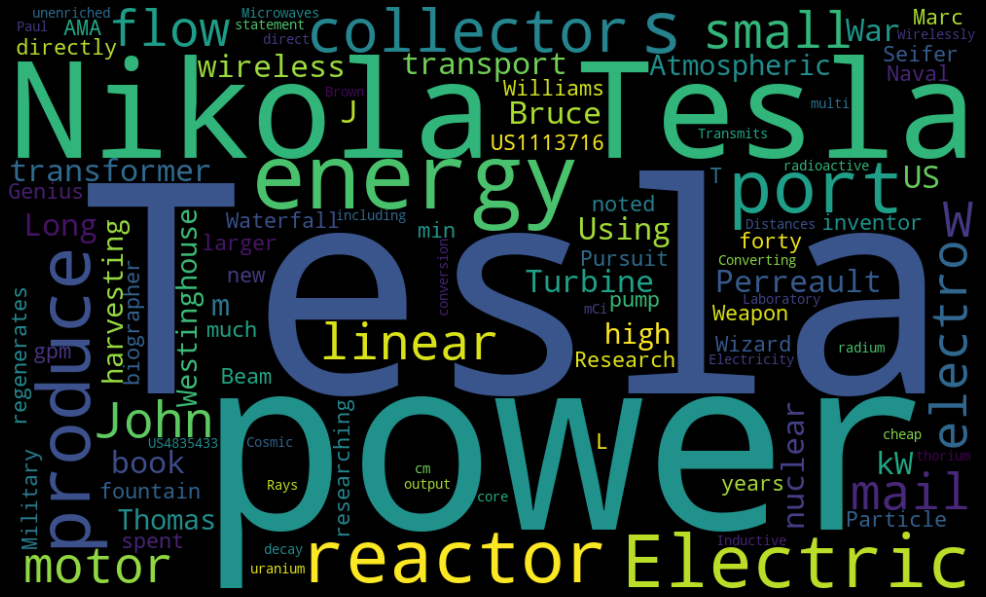

In [31]:
text = ' '.join( [twts for twts in df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");


In [36]:
from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])


[nltk_data] Downloading package opinion_lexicon to C:\Users\Venkat
[nltk_data]     Dyagala\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [62]:
df.head(20)


,Titles
0,Waterfall fountain 1913 Nikola Tesla US1113716...
1,John T Williams electro-port linear motor mail...
2,"I’m Marc J. Seifer, noted biographer of Tesla ..."
3,The US Military’s Naval Research Laboratory Tr...
4,Inductive nuclear reactor for direct conversio...
5,Bruce Perreault - Converting Cosmic Rays to El...
6,Tesla Statue on Cdn side of Niagara Falls 11/2...
7,Books Tesla Read? Educated?
8,Bruce Perreault alpha fusion valve 2007 US780...
9,Tesla's FBI File and US Patents


In [63]:
df['length'] = df['Titles'].str.len()
df.head()

,Titles,length
0,Waterfall fountain 1913 Nikola Tesla US1113716...,165
1,John T Williams electro-port linear motor mail...,66
2,"I’m Marc J. Seifer, noted biographer of Tesla ...",201
3,The US Military’s Naval Research Laboratory Tr...,113
4,Inductive nuclear reactor for direct conversio...,254


In [64]:
print(df.columns)


Index(['Titles', 'length'], dtype='object')


<AxesSubplot:>

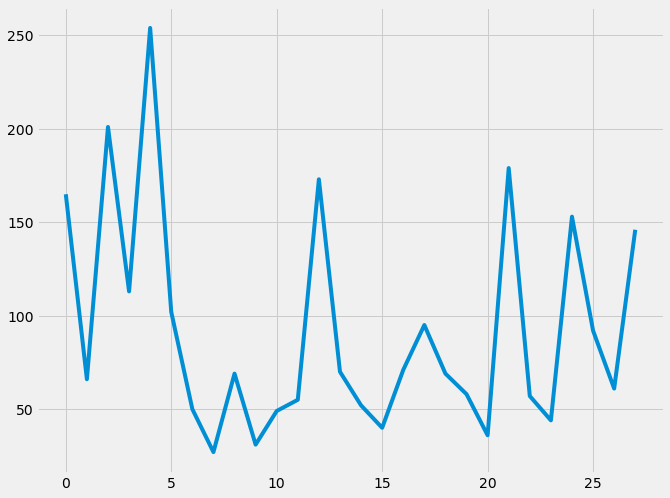

In [65]:
df['length'].plot()


<AxesSubplot:>

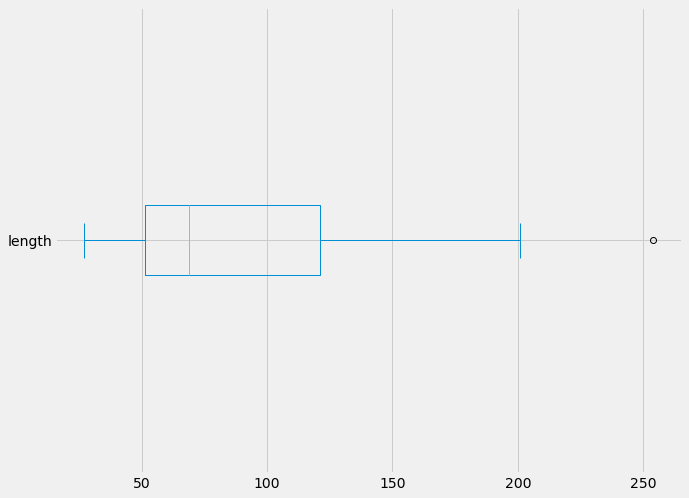

In [66]:
df['length'].plot(kind = 'box', vert = False)


<AxesSubplot:ylabel='Frequency'>

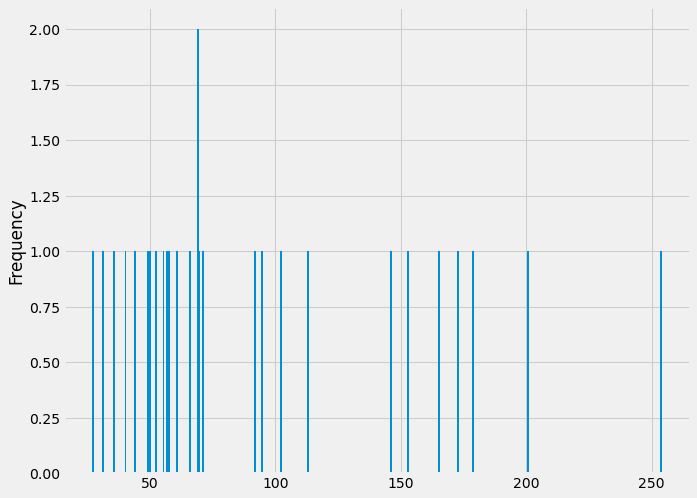

In [67]:
df['length'].plot(kind = 'hist', bins = 300)


# Pick 5 random strings which we will encounter in our day-to-day life as a data scientist and write regex to identify them and sort, provide an example and result of the regex for each string

In [48]:
import re
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

example_email = "example.user@example.com"
date_pattern = r'\b\d{4}-\d{2}-\d{2}\b'

example_date = "2024-02-14"
ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'

example_ip = "192.168.1.1"
hex_color_pattern = r'\b#[0-9A-Fa-f]{6}\b'

example_hex_color = "#AABBCC"
float_pattern = r'\b-?\d+\.\d+\b'

example_float = "-123.456"

if re.match(float_pattern, example_float):
    print(f"Match found: {example_float}")
else:
    print("No match found.")


if re.match(hex_color_pattern, example_hex_color):
    print(f"Match found: {example_hex_color}")
else:
    print("No match found.")


if re.match(ip_pattern, example_ip):
    print(f"Match found: {example_ip}")
else:
    print("No match found.")

if re.match(date_pattern, example_date):
    print(f"Match found: {example_date}")
else:
    print("No match found.")


if re.match(email_pattern, example_email):
    print(f"Match found: {example_email}")
else:
    print("No match found.")


No match found.
No match found.
Match found: 192.168.1.1
Match found: 2024-02-14
Match found: example.user@example.com
